In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv('features_time1.csv')

In [3]:
data.head()

,Unnamed: 0,Mean,SD,RMS,Peak-to-Peak,Kurtosis,Skewness,Crest,Status
0,0,23.335318,15.047893,27.762475,99.317060,0.143753,-0.220421,2.410229,stable
1,1,23.490211,17.022671,29.004799,140.822698,2.281786,0.251258,3.482453,stable
2,2,21.615567,13.863735,25.675829,80.046586,-0.107346,0.181700,2.432906,stable
3,3,21.496864,13.070224,25.155101,84.493619,0.541329,-0.382638,2.188628,stable
4,4,20.521180,16.470847,26.308605,99.317060,0.126628,-0.111501,2.599768,stable


In [4]:
data = data.drop(['Unnamed: 0'],axis=1)
#data = data.drop(['Unnamed: 0','RMS'],axis=1)
#data = data.drop(['Unnamed: 0','RMS','Peak-to-Peak'],axis=1)

In [5]:
data.head()

,Mean,SD,RMS,Peak-to-Peak,Kurtosis,Skewness,Crest,Status
0,23.335318,15.047893,27.762475,99.317060,0.143753,-0.220421,2.410229,stable
1,23.490211,17.022671,29.004799,140.822698,2.281786,0.251258,3.482453,stable
2,21.615567,13.863735,25.675829,80.046586,-0.107346,0.181700,2.432906,stable
3,21.496864,13.070224,25.155101,84.493619,0.541329,-0.382638,2.188628,stable
4,20.521180,16.470847,26.308605,99.317060,0.126628,-0.111501,2.599768,stable
...,...,...,...,...,...,...,...,...
335,38.530794,2699.395255,2698.351981,8886.653395,-1.409113,0.318021,1.921709,unstable
336,63.813158,2736.100840,2735.508935,8842.183070,-1.421717,0.328107,1.862009,unstable
337,49.403730,2715.152553,2714.276117,8822.912595,-1.432751,0.327478,1.874937,unstable
338,51.300089,2744.434620,2743.573890,9117.899088,-1.421678,0.326265,1.894897,unstable


In [6]:
data['Status'] = pd.Categorical(data['Status'])

In [7]:
train, test = train_test_split(data, test_size = None, shuffle = True,
                                                    random_state = 500)

In [8]:
train.head()

,Mean,SD,RMS,Peak-to-Peak,Kurtosis,Skewness,Crest,Status
319,2.085972,2640.210506,2638.921851,8286.304000,-1.450114,0.313602,1.778495,unstable
64,6.477996,258.952569,258.907151,1227.380986,-0.557173,-0.397888,2.107748,stable
45,10.030410,239.090496,239.184134,1010.958735,-1.041574,-0.378718,1.853925,stable
277,-40.356264,2054.959826,2054.352605,7436.920781,-1.425772,0.211353,2.068822,unstable
41,12.012177,231.677657,231.875856,1027.264521,-1.035311,-0.383469,1.925142,stable
...,...,...,...,...,...,...,...,...
72,4.193680,277.902568,277.798497,1362.274307,-0.810157,-0.402555,2.225879,stable
287,9.128555,2407.261792,2406.103400,8132.140205,-1.414301,0.297158,1.999255,unstable
206,-71.578138,1607.263238,1608.072075,6206.575107,-1.332003,0.145546,2.081587,transition
273,-68.127055,2028.129012,2028.282940,6741.701358,-1.448973,0.216899,1.825003,unstable


In [9]:
scaler = StandardScaler()
train_scaled= scaler.fit_transform(train.iloc[:,:-1])
test_scaled = (test.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)

In [10]:
mean_scaler = scaler.mean_

In [11]:
std_scaler = scaler.var_

In [12]:
type(mean_scaler)

numpy.ndarray

In [13]:
train_scaled[0]

array([ 0.36941982,  1.51894159,  1.51867128,  1.26942467, -0.85591525,
        1.14505623, -1.07704403])

## Training Logistic Regression

In [14]:
logistic_clf = LogisticRegression(C = 100, max_iter = 500, n_jobs = -1)

In [15]:
logistic_clf.fit(train_scaled, train['Status'])


LogisticRegression(C=100, max_iter=500, n_jobs=-1)

### Feature Importance

In [16]:
importance = abs(logistic_clf.coef_)

In [17]:
importance

array([[7.35237403, 4.05563076, 4.05574622, 8.76021533, 1.01608071,
        6.44850949, 1.88295955],
       [5.07516964, 2.55179091, 2.55043644, 4.82286514, 1.47748919,
        1.42381641, 0.05122804],
       [2.27720439, 6.60742167, 6.60618265, 3.93735019, 2.49356991,
        7.8723259 , 1.83173151]])

In [18]:
imp = np.mean(importance, axis = 0)

In [19]:
#plt.figure(figsize=(4,6))
#plt.bar(['RMS'], imp)
#plt.ylabel('Features coefficient magnitude', size = 12)
#plt.show()

(array([[0., 0., 0., 2., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 1., 2., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 3., 0., 0., 0., 0.]]),
 array([-10.87250229,  -8.80554207,  -6.73858185,  -4.67162163,
         -2.60466142,  -0.5377012 ,   1.52925902,   3.59621924,
          5.66317945,   7.73013967,   9.79709989]),
 <a list of 8 Lists of Patches objects>)

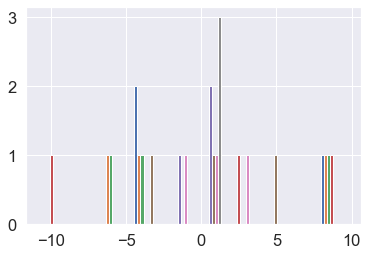

In [64]:
plt.hist(logistic_clf.coef_)

In [20]:
train_predictions = logistic_clf.predict(train_scaled)
test_predictions = logistic_clf.predict(test_scaled)

### Confusion Matrices

In [21]:
train_confusion_matrix = confusion_matrix(train['Status'], train_predictions)
test_confusion_matrix = confusion_matrix(test['Status'], test_predictions)


### Acuracy Calculation

In [22]:
train_accuracy = accuracy_score(train['Status'], train_predictions)
print("Ovearll training accuracy: ", train_accuracy)

Ovearll training accuracy:  1.0


In [23]:
logistic_clf.score(test_scaled,test['Status'])

1.0

In [24]:

test_accuracy = accuracy_score(test['Status'], test_predictions)
print("Ovearll testing accuracy: ", test_accuracy)

Ovearll testing accuracy:  1.0


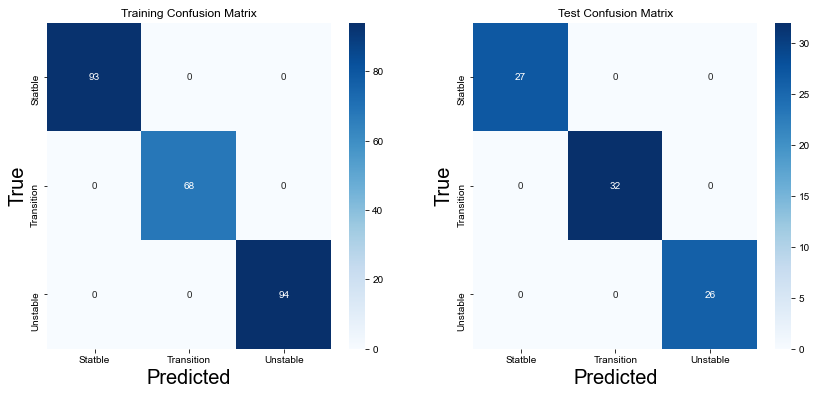

In [25]:

status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confusion_matrix, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('True',fontsize = 20)

plt.subplot(122)
sns.heatmap(test_confusion_matrix, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('True',fontsize = 20)
#plt.savefig('confusion_logistic.jpg', dpi = 400)
sns.set(font_scale = 1.5)
plt.show()

In [179]:
with open('model_lr_8f_1234567','wb') as f:
    pickle.dump(logistic_clf,f)

In [69]:
np.sort(logistic_clf.coef_)

array([[-10.87250229,  -5.25327509,  -5.25293996,  -4.26170586,
         -0.70599131,  -0.53699365,   1.73891049,   8.11036487],
       [ -4.54415993,  -4.53919333,  -3.49997277,  -0.38200374,
         -0.12159238,   0.54241302,   0.55712867,   2.78353241],
       [ -4.6103921 ,  -1.61731812,  -0.02013502,   1.08799505,
          3.71929283,   8.08896988,   9.79246841,   9.79709989]])

## Training decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [39]:
dt = DecisionTreeClassifier(max_depth=4)

In [40]:
dt.fit(train_scaled, train['Status'])

DecisionTreeClassifier(max_depth=4)

In [41]:
train_predict = dt.predict(train_scaled)
test_predict = dt.predict(test_scaled)

In [42]:
train_confusion = confusion_matrix(train['Status'], train_predict)
test_confusion = confusion_matrix(test['Status'], test_predict)


In [43]:
train_accu = accuracy_score(train['Status'], train_predict)
print("Ovearll training accuracy: ", train_accu)

test_accu = accuracy_score(test['Status'], test_predict)
print("Ovearll testing accuracy: ", test_accu)

Ovearll training accuracy:  1.0
Ovearll testing accuracy:  1.0


[Text(398.57142857142856, 391.392, 'X[2] <= 0.549\ngini = 0.66\nsamples = 255\nvalue = [93, 68, 94]'),
 Text(318.85714285714283, 304.416, 'X[3] <= -0.658\ngini = 0.488\nsamples = 161\nvalue = [93, 68, 0]'),
 Text(239.1428571428571, 217.44, 'X[0] <= 0.072\ngini = 0.061\nsamples = 96\nvalue = [93, 3, 0]'),
 Text(159.42857142857142, 130.464, 'X[5] <= -1.194\ngini = 0.49\nsamples = 7\nvalue = [4, 3, 0]'),
 Text(79.71428571428571, 43.488, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(239.1428571428571, 43.488, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(318.85714285714283, 130.464, 'gini = 0.0\nsamples = 89\nvalue = [89, 0, 0]'),
 Text(398.57142857142856, 217.44, 'gini = 0.0\nsamples = 65\nvalue = [0, 65, 0]'),
 Text(478.2857142857142, 304.416, 'gini = 0.0\nsamples = 94\nvalue = [0, 0, 94]')]

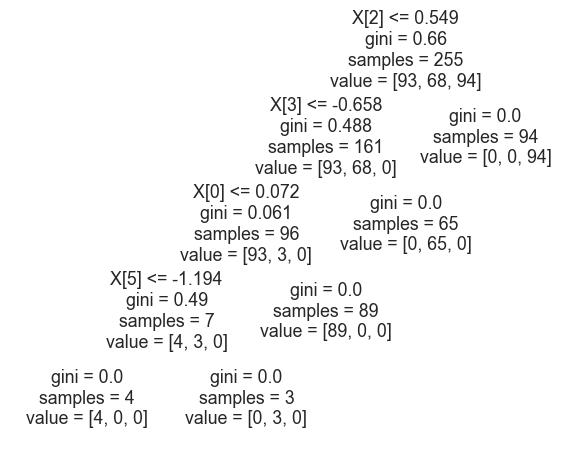

In [44]:
plt.figure(figsize = (10,8))
tree.plot_tree(dt) 
#plt.savefig('dt.jpg', dpi = 400)

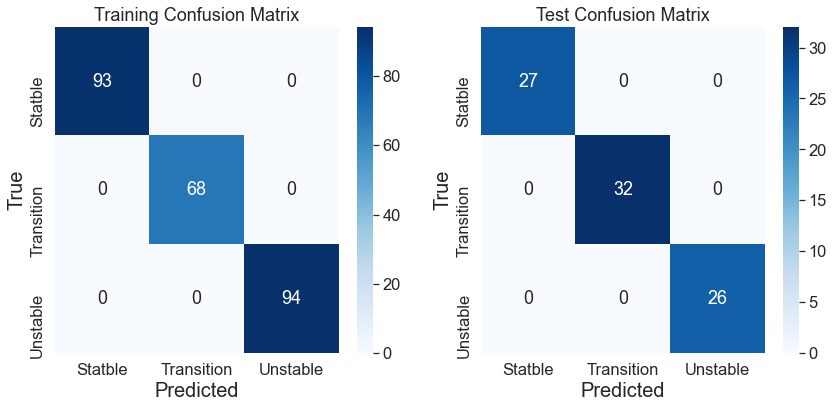

In [45]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confusion, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('True',fontsize = 20)

plt.subplot(122)
sns.heatmap(test_confusion, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('True',fontsize = 20)
plt.savefig('confusion_DecisionTree.jpg', dpi = 400)
sns.set(font_scale = 1.5)
plt.show()

In [46]:
with open('model_dt_8f_1234567','wb') as f:
    pickle.dump(dt,f)

## Training SVM

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [27]:
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [28]:
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)


In [29]:
tuned_svm_clf.fit(train_scaled, train['Status'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [30]:
tuned_svm_clf.best_score_

0.9884615384615385

In [31]:
tuned_svm_clf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=10, gamma=0.1)

In [33]:
train_predictions_svm = best_clf.predict(train_scaled)
test_predictions_svm = best_clf.predict(test_scaled)

In [34]:
train_confu_matrix_svm = confusion_matrix(train['Status'], train_predictions_svm)
test_confu_matrix_svm = confusion_matrix(test['Status'], test_predictions_svm)

In [35]:
train_accu_svm = accuracy_score(train['Status'], train_predictions_svm)
print("Ovearll training accuracy: ", train_accu_svm)

test_accu_svm = accuracy_score(test['Status'], test_predictions_svm)
print("Ovearll testing accuracy: ", test_accu_svm)

Ovearll training accuracy:  0.9882352941176471
Ovearll testing accuracy:  1.0


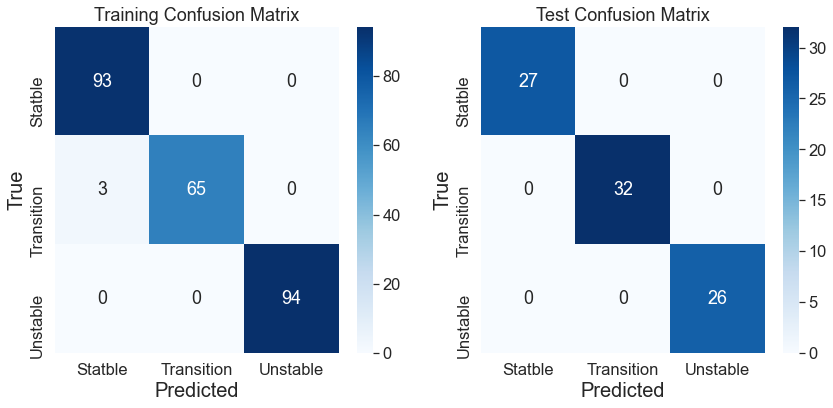

In [36]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confu_matrix_svm, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('True',fontsize = 20)

plt.subplot(122)
sns.heatmap(test_confu_matrix_svm, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('True',fontsize = 20)
plt.savefig('confusion_svm.jpg', dpi = 400)

plt.show()

In [37]:
with open('model_svm_8f_1234567','wb') as f:
    pickle.dump(best_clf,f)

# Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_clf = RandomForestClassifier(n_estimators= 150, max_features = 4, n_jobs = -1, random_state = 892)

In [49]:
rf_clf.fit(train_scaled, train['Status'])

RandomForestClassifier(max_features=4, n_estimators=150, n_jobs=-1,
                       random_state=892)

In [50]:
train_predict_rf = rf_clf.predict(train_scaled)
test_predict_rf = rf_clf.predict(test_scaled)

In [51]:
train_confusion_rf = confusion_matrix(train['Status'], train_predict_rf)
test_confusion_rf = confusion_matrix(test['Status'], test_predict_rf)


In [52]:
train_accu = accuracy_score(train['Status'], train_predict_rf )
print("Ovearll training accuracy: ", train_accu)

test_accu = accuracy_score(test['Status'], test_predict_rf)
print("Ovearll testing accuracy: ", test_accu)

Ovearll training accuracy:  1.0
Ovearll testing accuracy:  0.9882352941176471


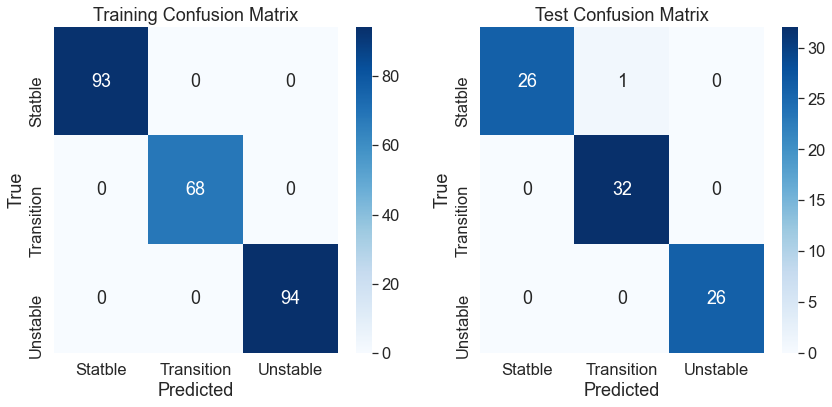

In [53]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confusion_rf, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(122)
sns.heatmap(test_confusion_rf, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_svm.jpg', dpi = 400)
plt.show()

In [54]:
with open('model_rf_8f_1234567','wb') as f:
    pickle.dump(rf_clf,f)